# <font color=red> Exploration 1. MNIST 숫자 손글씨 이미지 분류</font>

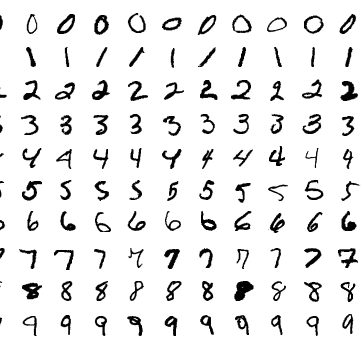

 __데이터 준비 -> 딥러닝 네트워크 설계 -> 학습 -> 평가__ 의 순서로 __Sequential Model__ 을 이용한 숫자 손글씨 이미지 분류기를 만들어보자.

##  1. MNIST 데이터 불러오기

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)   # Tensorflow 의 버전

2.5.0


In [10]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() # MNIST 데이터 로드

print(len(X_train), len(X_test))

60000 10000


위 코드를 통해 숫자 손글씨 데이터베이스인 MNIST 데이터 셋을 불러올 수 있다.
추가적으로 MNIST 데이터 셋은 __60000개의 training set 과 10000개의 test set__ 으로 이루어져 있음을 확인 할 수 있다.

training set 과 test set 을 나누는 것에 대한 개념적인 부분은 블로그에 정리하였다.

<font color=blue>링크(블로그 업로드 예정)</font>

이제 X_train 에 담긴 1번째 이미지를 출력해보자.

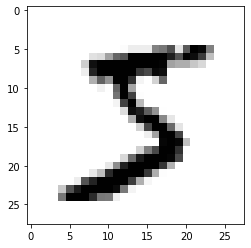

In [15]:
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.show()

이에 해당하는 목표변수인 y_train 에 담긴 1번째 값을 확인해보자.

In [17]:
print(y_train[0])

5


이것을 통해 X_train, X_test 에는 손글씨 숫자 이미지, y_train, y_test 에는 각 
이미지에 해당하는 각 숫자 값이 담겨있는 것을 확인 할 수 있다.

## 2. 데이터 전처리

In [21]:
print('최소값:',np.min(X_train), ' 최대값:',np.max(X_train))

최소값: 0  최대값: 255


숫자 손글씨 이미지의 픽셀 값은 0~255 사이의 값이다.

AI 모델을 훈련시키고 사용할때, 일반적으로 입력값을 0~1 사이 값으로 정규화 시킨다. (단위 차이와 같은 문제를 해결하기 위해) 

MNIST 데이터를 각각 255로 나누어 0~1 사이의 값으로 만들자.

In [22]:
X_train_norm, X_test_norm = X_train / 255.0, X_test / 255.0
print('최소값:',np.min(X_train_norm), ' 최대값:',np.max(X_train_norm))

최소값: 0.0  최대값: 1.0


## 3. 딥러닝 네트워크 설계

케라스에서 모델을 만드는 방법은 Sequential API, Funtional API 등을 이용하는 방법, 처음부터 직접 코딩하는 방법 등의 다양한 방법이있다. 그 중에서 Sequential API 는 개발의 자유도는 떨어지지만, 간단하게 딥러닝 모델을 설계 할 수 있는 장점이 있다.

텐서플로우 케라스에서 Sequential API 를 이용하여 간단하게 딥러닝 모델을 만들어보자.

In [23]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


tf.keras 의 Sequential API 를 이용하여 __LeNet__ 이라는 딥러닝 네트워크를 설계했다.

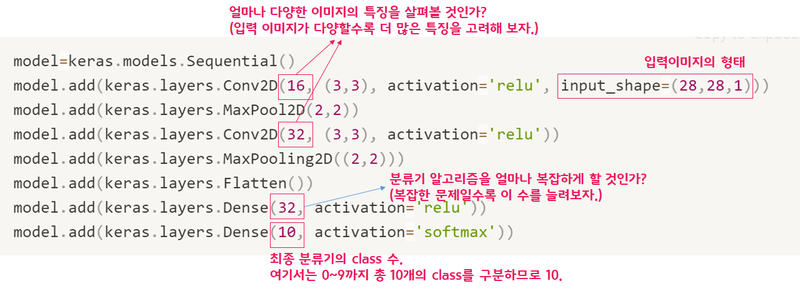
- Conv2D 레이어의 첫 번째 인자는 사용하는 이미지 특징의 수다. 여기서는 16과 32를 사용했다. 가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 의미다. 복잡한 이미지라면 (예. 사람 얼굴) 이 특징 숫자를 늘려주는 것을 고려할 수 있다.
- Dense 레이어의 첫번째 인자는 분류기에 사용되는 뉴런의 숫자다. 이 값이 클수록 보다 복잡한 분류기를 만들 수 있다. 10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개, 소문자 26개로 총 52개의 클래스를 분류해야한다. 그래서 32보다 큰 64, 128 등을 고려해볼 수 있다.
- 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해야하는 클래스 수로 지정하면 된다. 숫자 인식기에서는 10, 알파벳 인식기에서는 52가 된다.
<center>출처 : AIFFEL LMS</center>

이렇게 만든 딥러닝 네트워크 모델을 확인해보자.

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

## 4. 딥러닝 네트워크 학습

앞에서 만든 딥러닝 네트워크의 입력은 `(데이터개수, 이미지 크기 x, 이미지 크기 y, 채널수)` 의 형태를 가진다. 이전 단계에서 입력 값을 `input_shape = (28,28,1)` 로 지정하였다.

In [31]:
print(f'Before Reshape - X_train_norm shape: {X_train_norm.shape}')
print(f'Before Reshape - X_test_norm shape: {X_test_norm.shape}')

Before Reshape - X_train_norm shape: (60000, 28, 28)
Before Reshape - X_test_norm shape: (10000, 28, 28)


하지만 `X_train.shape` 을 해보면 `채널수` 에 대한 정보가 없는 것을 알 수 있다. 따라서 이 값을 `(60000, 28, 28, 1)` 로 만들어야한다. (여기서 채널수 1은 흑백 이미지를 의미한다. 만약 컬러 이미지라면 R,G,B 값이 있으므로 채널수가 3 이 될 것이다.)

_여기서 채널수 1은 흑백 이미지를 의미한다. 만약 컬러 이미지라면 R,G,B 값이 있으므로 채널수가 3 이 될 것이다._

In [36]:
# 데이터갯수에 -1을 쓰면 reshape시 자동계산
X_train_reshaped=X_train_norm.reshape( -1, 28, 28, 1)
X_test_reshaped=X_test_norm.reshape( -1, 28, 28, 1)

In [38]:
print(f"After Reshape - X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"After Reshape - X_test_reshaped shape: {X_test_reshaped.shape}")

After Reshape - X_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - X_test_reshaped shape: (10000, 28, 28, 1)


이렇게 만들어진 X_train_reshaped 데이터를 이용해 딥러닝 네트워크를 학습시켜보자.

In [39]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 13ms/step - loss: 0.1918 - accuracy: 0.9426
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0633 - accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0441 - accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0365 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0284 - accuracy: 0.9910
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0191 - accuracy: 0.9943
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0165 - accuracy: 0.9947
Epoch 9/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0129 - accuracy: 0.9960
Epoch 10/10
1875/1875 [==============================] - 29s 15m

여기서 `epochs = 10` 은 전체 60000개 데이터를 10번 반복해서 학습시키라는 의미이다.

학습이 진행됨에 따라 `epoch` 별로 정확도(`accurary`)를 확인 할 수 있다. 

## 성능 평가

Training set 와 Validation set 으로 만든 딥러닝 네트워크를 Test set 에서도 잘 작동하는지에 대한 평가가 필요하다.

In [40]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 2s - loss: 0.0335 - accuracy: 0.9903
test_loss: 0.03352785110473633 
test_accuracy: 0.9902999997138977


test set 을 이용한 정확도가 training set 을 이용한 정확도 보다 소폭 감소 한 것을 알 수 있다.

그럼 어떤 데이터를 잘못 예측하였을까? `model.predict()` 를 사용하면 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다.

In [45]:
predicted_result = model.predict(X_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

예시로 X_test 데이터 셋의 첫번째 이미지의 경우를 보자.

In [46]:
idx=0  #1번째 x_test
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [5.9416345e-07 4.6371298e-09 1.5854675e-05 1.0108819e-07 1.9528845e-09
 2.5684838e-12 1.5150651e-13 9.9998343e-01 1.1236478e-10 7.5842328e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


모델은 X_test 데이터의 첫번째 이미지를 7로 예측하고 있다. 그렇다면 실제로 X_test 데이터에 1번째 이미지를 보자.

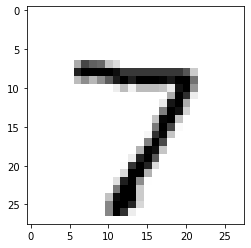

In [47]:
plt.imshow(X_test[idx],cmap=plt.cm.binary)
plt.show()

X_test 데이터의 1번째 이미지의 경우, 모델이 올바르게 예측한 것을 알 수 있다.

이러한 방법으로 모델이 예측한 숫자와 실제 라벨 값이 다른 경우를 직접 확인 할 수있다.

예측확률분포: [5.3558280e-10 5.6344474e-04 4.1296286e-09 6.1092067e-01 2.4670328e-06
 3.8816893e-01 3.3997552e-04 3.3571482e-08 3.9990045e-06 5.1581094e-07]
라벨: 5, 예측결과: 3


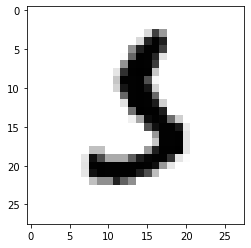

예측확률분포: [5.7296516e-12 3.3906443e-07 4.9934137e-08 3.2401758e-06 2.2424212e-01
 5.7780611e-08 3.5692938e-07 1.6477443e-03 5.6003504e-05 7.7405006e-01]
라벨: 4, 예측결과: 9


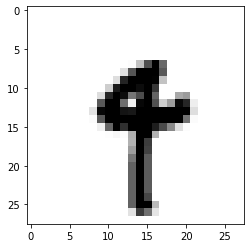

예측확률분포: [5.6199735e-07 2.0307798e-09 6.2821229e-08 8.6714521e-05 6.0516738e-09
 3.8598895e-03 8.9699061e-11 1.8354538e-06 6.9909795e-08 9.9605078e-01]
라벨: 5, 예측결과: 9


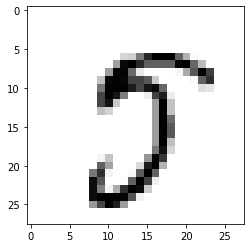

예측확률분포: [2.0519733e-10 1.0441423e-05 1.8122042e-06 1.5902073e-03 3.8726062e-05
 3.2063477e-07 2.4469326e-13 7.6047242e-01 2.3785760e-01 2.8468176e-05]
라벨: 8, 예측결과: 7


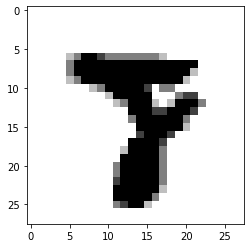

예측확률분포: [2.9282152e-08 8.5508383e-08 3.4261529e-07 2.1169173e-02 3.3626166e-05
 2.2706506e-04 2.4516043e-08 2.7329219e-09 9.7797692e-01 5.9266516e-04]
라벨: 3, 예측결과: 8


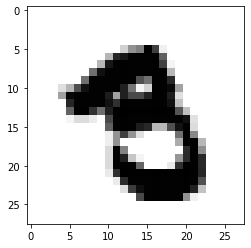

In [49]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모음
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑기
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(X_test[n], cmap=plt.cm.binary)
    plt.show()

모델의 추론 결과를 시각화하여 살펴봄으로써 모델 성능 개선에 도움이 되는 아이디어를 얻을 수 있다.

## 더 좋은 네트워크 만들기

모델의 더 높은 정확도를 이끌어내기 위해서 네트워크의 구조 자체를 바꾸지 않으면서도 시도 해볼 수 있는 것들이 있다. 그것은 바로 __하이퍼파라미터__ 들을 바꾸어보는 것이다.

`Conv2D` 레이어에서 입력 이미지의 특징수를 조정하거나, `Dense` 레이어에서 뉴런수를 조정하거나, 학습 반복 횟수인 `epoch` 값 등을 변경 해 볼 수 있다.

In [51]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16    # Conv2D 레이어에서 입력 이미지 특징수 조정
n_channel_2=32    # Conv2D 레이어에서 입력 이미지 특징수 조정
n_dense=32        # Dense 레이어에서 뉴런 수 조정
n_train_epoch=10     # 학습 반복 횟수 조정

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(X_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               